In [327]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, YearLocator, date2num, drange
import matplotlib.ticker as ticker
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

In [375]:
df = pd.read_csv(r"C:\Users\daisu\Downloads\zmi2015s.csv",encoding="SHIFT-JIS",parse_dates=['類・品目'])

In [376]:
df.dtypes

類・品目                  object
総合                    object
生鮮食品を除く総合             object
持家の帰属家賃を除く総合          object
持家の帰属家賃及び生鮮食品を除く総合    object
                       ...  
エネルギー                 object
教育関係費                 object
教養娯楽関係費               object
情報通信関係費               object
生鮮食品及びエネルギーを除く総合      object
Length: 79, dtype: object

In [377]:
df = df.drop(df.index[[i for i in range(0, 485)]])

In [378]:
new_xticks = []
df['総合'] = df['総合'].astype(float)
df['類・品目'] = pd.to_datetime(df['類・品目'] + "01")

In [379]:
# df['総合'] = df['総合'].astype(float)
# df['類・品目'] = df['類・品目'].astype(str)
# df['date'] = df['類・品目'].str[:4] + '-' + df['類・品目'].str[4:]
# for index, row in df.iterrows():
#     row['date'] =  datetime(int(row['類・品目'][:4]), int(row['類・品目'][4:]), 1)
#     new_xticks.append(date2num(datetime(int(row['類・品目'][:4]), int(row['類・品目'][4:]), 1)))
    
# df.head(10)

In [380]:
np.mean(df.iloc[:12]['総合'])

96.52500000000002

In [381]:
df['cpi'] = (df['総合']/ 96.52500000000002) * 100
#df['date'] = df['類・品目'].str[:4] + '-' + df['類・品目'].str[4:]
#df['date'] = pd.datetime(df['類・品目'].str[:4].astype(int), df['類・品目'].str[4:].astype(int))
#[2010, 2011,2012,2013,2014, 2015, 2016, 2017, 2018, 2019, 2020]
df.head(10)

,類・品目,総合,生鮮食品を除く総合,持家の帰属家賃を除く総合,持家の帰属家賃及び生鮮食品を除く総合,食料（酒類を除く）及びエネルギーを除く総合,食料,生鮮食品,生鮮食品を除く食料,穀類,...,理美容用品,身の回り用品,たばこ,他の諸雑費,エネルギー,教育関係費,教養娯楽関係費,情報通信関係費,生鮮食品及びエネルギーを除く総合,cpi
485,2010-01-01,96.6,97.1,95.7,96.3,99.3,93.8,85.7,95.4,101.6,...,98.9,86.4,69.3,87.5,84.6,102.7,101.3,100.4,98.3,100.0777
486,2010-02-01,96.6,97.1,95.7,96.3,99.2,93.7,85.0,95.4,101.4,...,98.5,86.3,69.3,87.5,85.7,102.7,101.2,100.4,98.2,100.0777
487,2010-03-01,96.8,97.3,96.0,96.5,99.5,93.8,86.4,95.3,101.3,...,99.0,86.4,69.3,87.6,86.1,102.7,101.8,100.4,98.4,100.2849
488,2010-04-01,96.9,97.1,96.0,96.3,99.2,94.4,91.2,95.1,101.2,...,98.7,86.3,69.3,87.6,86.6,95.6,101.9,100.4,98.2,100.3885
489,2010-05-01,96.8,97.1,96.0,96.3,99.1,94.1,90.0,94.9,101.1,...,98.6,86.1,69.3,87.6,88.2,95.7,101.6,100.4,98.0,100.2849
490,2010-06-01,96.6,97.0,95.7,96.1,98.8,94.0,89.0,95.0,101.0,...,98.5,86.2,69.3,87.6,88.0,95.7,100.9,100.4,97.8,100.0777
491,2010-07-01,96.1,96.6,95.1,95.7,98.4,93.1,84.7,94.8,100.6,...,98.4,85.8,69.3,87.6,87.7,95.6,100.5,100.4,97.4,99.5597
492,2010-08-01,96.2,96.6,95.3,95.7,98.4,93.5,87.8,94.7,100.4,...,98.0,86.1,69.3,87.6,87.8,95.7,101.9,100.4,97.5,99.6633
493,2010-09-01,96.4,96.6,95.5,95.7,98.4,94.3,92.0,94.8,100.2,...,98.5,86.1,69.3,87.6,87.7,95.6,99.6,100.4,97.5,99.8705
494,2010-10-01,96.7,96.9,95.9,96.0,98.9,94.4,93.3,94.6,99.1,...,98.3,86.2,95.9,94.0,87.5,95.6,100.0,100.4,97.8,100.1813


In [419]:
df.iloc[50:55,:]

,類・品目,総合,生鮮食品を除く総合,持家の帰属家賃を除く総合,持家の帰属家賃及び生鮮食品を除く総合,食料（酒類を除く）及びエネルギーを除く総合,食料,生鮮食品,生鮮食品を除く食料,穀類,...,理美容用品,身の回り用品,たばこ,他の諸雑費,エネルギー,教育関係費,教養娯楽関係費,情報通信関係費,生鮮食品及びエネルギーを除く総合,cpi
535,2014-03-01,97.5,97.7,96.9,97.2,97.5,95.0,93.0,95.4,99.7,...,96.1,94.8,95.9,100.3,104.3,97.0,95.4,98.8,97.0,101.010101
536,2014-04-01,99.5,99.8,99.4,99.7,99.5,97.4,93.6,98.2,102.5,...,99.2,97.5,100.0,100.4,106.4,98.7,98.6,101.0,99.1,103.082103
537,2014-05-01,99.9,100.1,99.8,100.1,99.5,97.5,94.2,98.2,102.6,...,98.8,97.6,100.0,100.4,110.0,98.7,98.5,101.7,99.2,103.496503
538,2014-06-01,99.8,100.1,99.7,100.1,99.4,97.3,92.3,98.3,102.1,...,98.8,97.4,100.0,100.4,110.4,98.7,98.7,100.8,99.1,103.392903
539,2014-07-01,99.9,100.3,99.8,100.3,99.5,97.3,91.1,98.5,101.8,...,98.5,96.9,100.0,100.4,110.9,98.7,99.6,100.4,99.2,103.496503


In [422]:
df.iloc[110:120,:]

,類・品目,総合,生鮮食品を除く総合,持家の帰属家賃を除く総合,持家の帰属家賃及び生鮮食品を除く総合,食料（酒類を除く）及びエネルギーを除く総合,食料,生鮮食品,生鮮食品を除く食料,穀類,...,理美容用品,身の回り用品,たばこ,他の諸雑費,エネルギー,教育関係費,教養娯楽関係費,情報通信関係費,生鮮食品及びエネルギーを除く総合,cpi
595,2019-03-01,101.5,101.5,101.9,101.9,100.5,103.5,102.9,103.6,105.2,...,99.3,102.8,111.6,102.7,103.5,103.1,102.1,94.6,101.3,105.154105
596,2019-04-01,101.8,101.8,102.2,102.3,100.9,103.5,101.8,103.9,105.6,...,99.2,104.2,111.6,102.6,103.4,103.5,103.1,94.6,101.6,105.464905
597,2019-05-01,101.8,101.8,102.2,102.2,100.8,103.6,102.1,103.9,105.8,...,99.1,104.1,111.6,102.6,104.0,103.6,102.6,94.6,101.6,105.464905
598,2019-06-01,101.6,101.6,102.1,102.0,100.6,103.9,102.6,104.1,106.0,...,98.7,104.1,111.6,102.6,103.1,103.5,102.6,92.5,101.5,105.257705
599,2019-07-01,101.6,101.5,102.0,102.0,100.5,104.0,102.3,104.3,106.2,...,98.6,103.8,111.6,102.6,102.3,103.6,102.5,92.6,101.5,105.257705
600,2019-08-01,101.8,101.7,102.3,102.2,100.9,104.2,104.5,104.2,106.0,...,98.5,104.5,111.6,102.6,101.7,103.6,105.2,92.6,101.7,105.464905
601,2019-09-01,101.9,101.6,102.4,102.1,100.8,105.2,109.4,104.4,106.3,...,98.7,104.3,111.6,102.6,100.8,103.7,102.8,92.6,101.7,105.568506
602,2019-10-01,102.2,102.0,102.8,102.5,101.1,105.5,107.7,105.1,106.7,...,100.7,106.3,113.5,89.9,101.6,97.1,105.0,93.4,102.0,105.879306
603,2019-11-01,102.3,102.2,102.8,102.7,101.1,105.3,105.5,105.3,106.5,...,100.8,106.1,113.5,89.9,102.4,97.1,104.6,93.7,102.1,105.982906
604,2019-12-01,102.3,102.2,102.8,102.7,101.2,105.2,105.0,105.2,106.2,...,100.1,106.2,113.5,89.9,102.5,97.2,105.0,93.7,102.1,105.982906


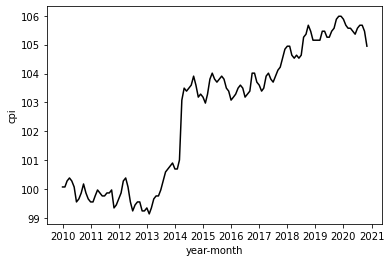

In [412]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(df['類・品目'],df['cpi'], color='black')
#ax.set_title('消費者物価指数')
ax.set_xlabel('year-month')
ax.set_ylabel('cpi')
ax.xaxis.set_major_locator(YearLocator(1))
ax.xaxis.set_major_formatter(DateFormatter('%Y'))
fig.savefig("cpi1.png")

In [383]:
# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)
# ax.plot(df['date'],df['cpi'], color='black')
# ax.set_xlabel('year-month')
# ax.set_ylabel('cpi')
# ax.xaxis.set_major_locator(ticker.FixedLocator(new_xticks))
# ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

,類・品目,総合,生鮮食品を除く総合,持家の帰属家賃を除く総合,持家の帰属家賃及び生鮮食品を除く総合,食料（酒類を除く）及びエネルギーを除く総合,食料,生鮮食品,生鮮食品を除く食料,穀類,...,理美容用品,身の回り用品,たばこ,他の諸雑費,エネルギー,教育関係費,教養娯楽関係費,情報通信関係費,生鮮食品及びエネルギーを除く総合,cpi
611,2020-07-01,101.9,101.6,102.3,102.0,100.8,105.9,109.5,105.3,106.3,...,100.4,107.3,113.5,89.9,97.8,95.5,104.1,94.8,101.9,105.568506
612,2020-08-01,102.0,101.3,102.5,101.7,100.5,107.2,118.6,105.1,105.9,...,100.4,107.0,113.5,89.9,98.1,95.4,102.8,94.8,101.6,105.672106
613,2020-09-01,102.0,101.3,102.5,101.7,100.5,107.2,118.0,105.2,105.5,...,100.8,107.3,113.5,89.9,97.3,95.5,101.0,94.8,101.6,105.672106
614,2020-10-01,101.8,101.3,102.3,101.7,100.7,106.7,113.5,105.4,105.9,...,100.7,107.2,124.4,89.9,95.8,95.3,101.0,94.6,101.8,105.464905
615,2020-11-01,101.3,101.2,101.7,101.6,100.7,105.1,104.4,105.3,105.4,...,100.6,107.8,124.4,89.9,94.5,95.3,100.8,94.6,101.8,104.946905


In [405]:
df2 = pd.read_csv(r"C:\Users\daisu\Downloads\nme_R031.20647.20210116150244.01.csv",encoding="SHIFT-JIS")
df2 = df2.drop(df2.index[[0,132, 133,134,135,136,137,138,139,140,141,142, 143, 144]])
df2 = df2.rename(columns={'データコード': 'date', "MD01'MABS1AN11":'monetary-base'})
df2.tail(12)

,date,monetary-base
120,2019/12,5127767
121,2020/01,5141329
122,2020/02,5106311
123,2020/03,5078486
124,2020/04,5189225
125,2020/05,5308787
126,2020/06,5440233
127,2020/07,5667600
128,2020/08,5715919
129,2020/09,5871952


In [406]:
df2['monetary-base'] = df2['monetary-base'].astype(float)
np.mean(df2.iloc[:12]['monetary-base'])

984287.6666666666

In [407]:
df2['monetary-base-100'] = (df2['monetary-base']/984287.6666666666) *100
df2.head()

,date,monetary-base,monetary-base-100
1,2010/01,980675.0,99.632966
2,2010/02,956928.0,97.220359
3,2010/03,964571.0,97.996859
4,2010/04,983836.0,99.954112
5,2010/05,984323.0,100.003590


In [408]:
df2['date'] = pd.to_datetime(df2['date'] + "/01")

In [409]:
len(df)

131

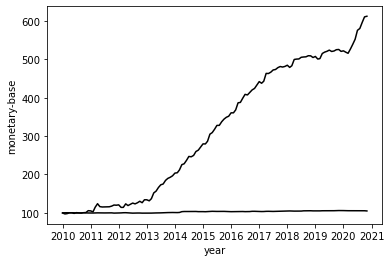

In [413]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(df2['date'],df2['monetary-base-100'], color='black')
ax.plot(df2['date'],df['cpi'], color='black')
#ax.set_title('マネタリーベース平均残高')
ax.set_xlabel('year')
ax.set_ylabel('monetary-base')
ax.xaxis.set_major_locator(YearLocator(1))
ax.xaxis.set_major_formatter(DateFormatter('%Y'))
fig.savefig("monetary-base.png")

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(df2['date'],df2['monetary-base-100'], color='black')
ax.set_xlabel('year')
ax.set_ylabel('monetary-base')
ax.xaxis.set_major_locator(YearLocator(1))
ax.xaxis.set_major_formatter(DateFormatter('%Y'))

In [403]:
df2.tail(12)

,date,monetary-base
121,2020/01,5141329
122,2020/02,5106311
123,2020/03,5078486
124,2020/04,5189225
125,2020/05,5308787
126,2020/06,5440233
127,2020/07,5667600
128,2020/08,5715919
129,2020/09,5871952
130,2020/10,6012845
